# Kernel SHAP vs Tree SHAP
Experiments to understand the time complexity of SHAP approximations

In [160]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import sklearn.datasets as ds

import datetime

import shap
shap.initjs()

path = "/Users/conorosully/Google Drive/My Drive/Medium/SHAP kernel v tree/{}"

In [284]:
# Functions
def runSHAP(n,kernel=True): 
    """
    Calculate shap values and return time taken
        n: number of SHAP values to calculate
        kernel: set False if using TreeSHAP 
    """
    
    x_sample = X[np.random.choice(X.shape[0], n, replace=True)]
    
    begin = datetime.datetime.now()
    if kernel:
        #Caculate SHAP values using KernelSHAP
        shap_values = kernelSHAP.shap_values(x_sample,l1_reg=False)
        time = datetime.datetime.now() - begin
        print("Kernel {}: ".format(n), time)
    else:
        #Caculate SHAP values using TreeSHAP
        shap_values = treeSHAP(x_sample)
        time = datetime.datetime.now() - begin
        print("Tree {}: ".format(n), time)
    
    return time

def model_properties(model):
    """Returns average depth and number of features and leaves of a random forest"""
    
    depths = []
    features = []
    leaves = []
    
    for tree in model.estimators_:
        depths.append(tree.get_depth())
        leaves.append(tree.get_n_leaves())
        n_feat = len(set(tree.tree_.feature)) -1 
        features.append(n_feat)
        
    return np.mean(depths), np.mean(features), np.mean(leaves)

## Experiment 1: Number of samples

In [29]:
#Simulate regression data
data = ds.make_regression(n_samples=10000, n_features=10, n_informative=8, n_targets=1)

y= data[1]
X = data[0]

feature_names = range(len(X))

In [30]:
#Train model
model = RandomForestRegressor(n_estimators=100,max_depth=4,random_state=0)
model.fit(X, y)

RandomForestRegressor(max_depth=4, random_state=0)

In [31]:
#Get shap estimators
kernelSHAP = shap.KernelExplainer(model.predict,shap.sample(X, 10))
treeSHAP = shap.TreeExplainer(model)

In [32]:
results = []
for n in [10,100,1000,2000,5000,10000]*3:
    #Calculate SHAP Values
    kernel_time = runSHAP(n=n)
    tree_time = runSHAP(n=n,kernel=False)
    
    result = [n,kernel_time,tree_time]
    results.append(result)
    
results_1 = pd.DataFrame(results,columns = ['n','kernelSHAP','treeSHAP'])

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 11.92it/s]


Kernel 10:  0:00:00.848113
Tree 10:  0:00:00.001769


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.16it/s]


Kernel 100:  0:00:08.228731
Tree 100:  0:00:00.018296


100%|███████████████████████████████████████| 1000/1000 [01:21<00:00, 12.27it/s]


Kernel 1000:  0:01:21.493810
Tree 1000:  0:00:00.147421


100%|███████████████████████████████████████| 2000/2000 [02:43<00:00, 12.20it/s]


Kernel 2000:  0:02:44.003994
Tree 2000:  0:00:00.289881


100%|███████████████████████████████████████| 5000/5000 [06:49<00:00, 12.20it/s]


Kernel 5000:  0:06:49.965660
Tree 5000:  0:00:00.720394


100%|█████████████████████████████████████| 10000/10000 [13:39<00:00, 12.20it/s]


Kernel 10000:  0:13:39.425684
Tree 10000:  0:00:01.450180


100%|███████████████████████████████████████████| 10/10 [00:01<00:00,  8.51it/s]


Kernel 10:  0:00:01.178009
Tree 10:  0:00:00.001799


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.04it/s]


Kernel 100:  0:00:08.306340
Tree 100:  0:00:00.017352


100%|███████████████████████████████████████| 1000/1000 [01:28<00:00, 11.34it/s]


Kernel 1000:  0:01:28.158980
Tree 1000:  0:00:00.177166


100%|███████████████████████████████████████| 2000/2000 [02:52<00:00, 11.60it/s]


Kernel 2000:  0:02:52.465081
Tree 2000:  0:00:00.284468


100%|███████████████████████████████████████| 5000/5000 [06:50<00:00, 12.18it/s]


Kernel 5000:  0:06:50.381332
Tree 5000:  0:00:00.723140


100%|█████████████████████████████████████| 10000/10000 [13:39<00:00, 12.20it/s]


Kernel 10000:  0:13:39.801783
Tree 10000:  0:00:01.437625


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 11.71it/s]


Kernel 10:  0:00:00.858649
Tree 10:  0:00:00.003410


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.22it/s]


Kernel 100:  0:00:08.190796
Tree 100:  0:00:00.020027


100%|███████████████████████████████████████| 1000/1000 [01:22<00:00, 12.18it/s]


Kernel 1000:  0:01:22.101332
Tree 1000:  0:00:00.145129


100%|███████████████████████████████████████| 2000/2000 [02:45<00:00, 12.06it/s]


Kernel 2000:  0:02:45.873212
Tree 2000:  0:00:00.296458


100%|███████████████████████████████████████| 5000/5000 [06:55<00:00, 12.05it/s]


Kernel 5000:  0:06:55.069067
Tree 5000:  0:00:00.721003


100%|█████████████████████████████████████| 10000/10000 [13:42<00:00, 12.16it/s]


Kernel 10000:  0:13:42.459270
Tree 10000:  0:00:01.440620


0    413.409286
1    444.118709
2    535.970927
3    576.869831
4    570.753297
5    568.725877
Name: n, dtype: float64


Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


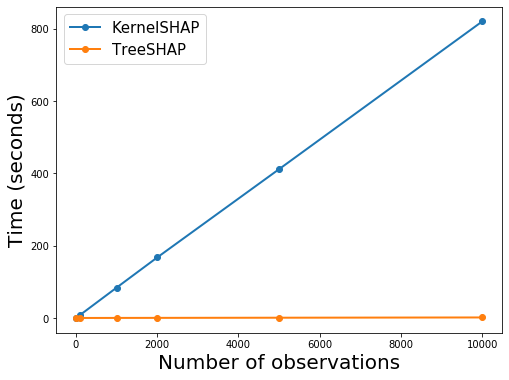

In [296]:
#Find average run time
avg_1 = results_1.groupby(by='n',as_index=False).mean()

k_sec = [t.total_seconds() for t in avg_1['kernelSHAP']]
t_sec = [t.total_seconds() for t in avg_1['treeSHAP']]
n = avg_1['n']

#Proportional run time
print((k_sec/n)/(t_sec/n))

#Plot run time by number of observations
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.plot(n, k_sec, linestyle='-', linewidth=2,marker='o',label = 'KernelSHAP')
plt.plot(n, t_sec, linestyle='-', linewidth=2,marker='o',label = 'TreeSHAP')

plt.ylabel('Time (seconds)',size=20)
plt.xlabel('Number of observations',size=20)
plt.legend(fontsize=15)

plt.savefig(path.format('n_observations_1.png'),dpi=100,bbox_inches='tight')

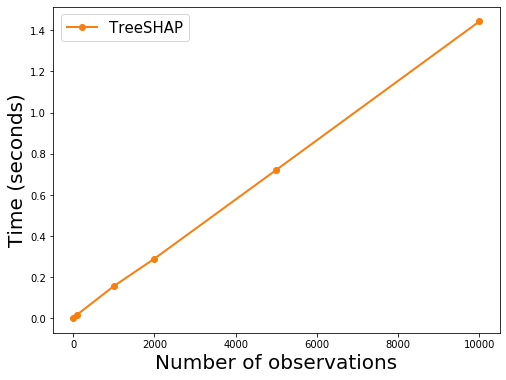

In [297]:
#Number of observations
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.plot(n, t_sec, linestyle='-', color='#F87F0E',linewidth=2,marker='o',label = 'TreeSHAP')

plt.ylabel('Time (seconds)',size=20)
plt.xlabel('Number of observations',size=20)
plt.legend(fontsize=15)

plt.savefig(path.format('n_observations_2.png'),dpi=100,bbox_inches='tight')

## Experiment 2: number of features
    

In [ ]:
results = []

for n_features, n_informative in zip([2,4,6,8,10,12,13,14,16,18,20]*3,[2,4,6,8,10,12,13,14,16,18,20]*3):
    
    #Simulate regression data
    data = ds.make_regression(n_samples=10000, n_features=n_features, n_informative=n_informative, n_targets=1,noise=0.1)

    y= data[1]
    X = data[0]

    feature_names = range(len(X))

    #Train model
    model = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=0)
    model.fit(X, y)
    
    #get model properties
    avg_depth, avg_feat, avg_leaves = model_properties(model)
    
    #Get shap estimators
    kernelSHAP = shap.KernelExplainer(model.predict,shap.sample(X, 10))
    treeSHAP = shap.TreeExplainer(model)
    
    #Calculate SHAP values
    kernel_time = runSHAP(n=100)
    tree_time = runSHAP(n=100,kernel=False)
    
    result = [n_features, avg_depth, avg_feat, avg_leaves, kernel_time,tree_time]
    results.append(result)

results_2 = pd.DataFrame(results,columns = ['n_features','avg_depth', 'avg_feat', 'avg_leaves','kernelSHAP','treeSHAP'])



100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 57.79it/s]


Kernel 100:  0:00:01.732726
Tree 100:  0:00:00.725702


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 50.59it/s]


Kernel 100:  0:00:01.979752
Tree 100:  0:00:01.300102


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 26.83it/s]


Kernel 100:  0:00:03.731523
Tree 100:  0:00:02.637549


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.91it/s]


Kernel 100:  0:00:07.190306
Tree 100:  0:00:02.483648


100%|█████████████████████████████████████████| 100/100 [00:17<00:00,  5.81it/s]


Kernel 100:  0:00:17.225610
Tree 100:  0:00:02.734488


100%|█████████████████████████████████████████| 100/100 [00:31<00:00,  3.16it/s]


Kernel 100:  0:00:31.632570
Tree 100:  0:00:02.732940


100%|█████████████████████████████████████████| 100/100 [00:29<00:00,  3.42it/s]


Kernel 100:  0:00:29.280547
Tree 100:  0:00:02.577223


100%|█████████████████████████████████████████| 100/100 [00:31<00:00,  3.15it/s]


Kernel 100:  0:00:31.723399
Tree 100:  0:00:02.590536


100%|█████████████████████████████████████████| 100/100 [00:28<00:00,  3.51it/s]


Kernel 100:  0:00:28.492789
Tree 100:  0:00:02.897389


100%|█████████████████████████████████████████| 100/100 [00:27<00:00,  3.64it/s]


Kernel 100:  0:00:27.461492
Tree 100:  0:00:02.931957


100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.92it/s]


Kernel 100:  0:00:25.527210
Tree 100:  0:00:02.910375


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 56.93it/s]


Kernel 100:  0:00:01.758412
Tree 100:  0:00:00.655755


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 49.97it/s]


Kernel 100:  0:00:02.003977
Tree 100:  0:00:00.952057


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 34.59it/s]


Kernel 100:  0:00:02.893207
Tree 100:  0:00:01.525950


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.84it/s]


Kernel 100:  0:00:05.041999
Tree 100:  0:00:02.002592


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.17it/s]


Kernel 100:  0:00:13.941234
Tree 100:  0:00:02.958655


100%|█████████████████████████████████████████| 100/100 [00:27<00:00,  3.67it/s]


Kernel 100:  0:00:27.236234
Tree 100:  0:00:02.525088


100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.97it/s]


Kernel 100:  0:00:25.217214
Tree 100:  0:00:02.483521


100%|█████████████████████████████████████████| 100/100 [00:27<00:00,  3.58it/s]


Kernel 100:  0:00:27.910716
Tree 100:  0:00:03.065891


100%|█████████████████████████████████████████| 100/100 [00:27<00:00,  3.64it/s]


Kernel 100:  0:00:27.445918
Tree 100:  0:00:03.173113


100%|█████████████████████████████████████████| 100/100 [00:27<00:00,  3.68it/s]


Kernel 100:  0:00:27.205086
Tree 100:  0:00:03.031801


100%|█████████████████████████████████████████| 100/100 [00:27<00:00,  3.64it/s]


Kernel 100:  0:00:27.463484
Tree 100:  0:00:02.989585


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 58.27it/s]


Kernel 100:  0:00:01.717895
Tree 100:  0:00:00.692064


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 50.07it/s]


Kernel 100:  0:00:01.999420
Tree 100:  0:00:00.968511


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.49it/s]


Kernel 100:  0:00:02.742911
Tree 100:  0:00:01.600745


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.22it/s]


Kernel 100:  0:00:05.491577
Tree 100:  0:00:02.206723


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


Kernel 100:  0:00:13.610569
Tree 100:  0:00:02.414437


 67%|████████████████████████████▏             | 67/100 [00:18<00:09,  3.63it/s]

In [ ]:
#Get average run time
avg_2 = results_2[['n_features','kernelSHAP','treeSHAP']].groupby(by='n_features',as_index=False).mean()

k_sec = [t.total_seconds() for t in avg_2['kernelSHAP']]
t_sec = [t.total_seconds() for t in avg_2['treeSHAP']]
n = avg_2['n_features']

print((k_sec/n)/(t_sec/n))

#Plot run time by number of features
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.plot(n, k_sec, linestyle='-', linewidth=2,marker='o',label = 'KernelSHAP')
plt.plot(n, t_sec, linestyle='-', linewidth=2,marker='o',label = 'TreeSHAP')

plt.ylabel('Time (seconds)',size=20)
plt.xlabel('Number of features',size=20)
plt.legend(fontsize=15)

plt.savefig(path.format('n_features_1.png'),dpi=100,bbox_inches='tight')

## Experiment 3: number of trees

In [20]:
#Simulate regression data
data = ds.make_regression(n_samples=10000, n_features=10, n_informative=8, n_targets=1)

y= data[1]
X = data[0]

feature_names = range(len(X))

In [21]:
results = []

for trees in [10,20,50,100,200,500,1000]*3:
    #Train model
    model = RandomForestRegressor(n_estimators=trees,max_depth=4,random_state=0)
    model.fit(X, y)
    
    #Get shap estimators
    kernelSHAP = shap.KernelExplainer(model.predict,shap.sample(X, 10))
    treeSHAP = shap.TreeExplainer(model)
    
    #Calculate SHAP Values
    kernel_time = runSHAP(n=100)
    tree_time = runSHAP(n=100,kernel=False)
    
    result = [trees,kernel_time,tree_time]
    results.append(result)

results_3 = pd.DataFrame(results,columns = ['trees','kernelSHAP','treeSHAP'])

100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.41it/s]


Kernel 100:  0:00:06.491790
Tree 100:  0:00:00.002582


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.45it/s]


Kernel 100:  0:00:06.924396
Tree 100:  0:00:00.005085


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.16it/s]


Kernel 100:  0:00:07.599756
Tree 100:  0:00:00.011035


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 11.09it/s]


Kernel 100:  0:00:09.017838
Tree 100:  0:00:00.024362


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.65it/s]


Kernel 100:  0:00:13.073442
Tree 100:  0:00:00.040135


100%|█████████████████████████████████████████| 100/100 [00:22<00:00,  4.47it/s]


Kernel 100:  0:00:22.359844
Tree 100:  0:00:00.099160


100%|█████████████████████████████████████████| 100/100 [00:34<00:00,  2.88it/s]


Kernel 100:  0:00:34.672959
Tree 100:  0:00:00.172348


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.63it/s]


Kernel 100:  0:00:06.014889
Tree 100:  0:00:00.003357


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.06it/s]


Kernel 100:  0:00:06.228530
Tree 100:  0:00:00.005107


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.03it/s]


Kernel 100:  0:00:07.131437
Tree 100:  0:00:00.012141


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Kernel 100:  0:00:08.690979
Tree 100:  0:00:00.019698


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


Kernel 100:  0:00:13.471830
Tree 100:  0:00:00.042296


100%|█████████████████████████████████████████| 100/100 [00:20<00:00,  4.91it/s]


Kernel 100:  0:00:20.378208
Tree 100:  0:00:00.093927


100%|█████████████████████████████████████████| 100/100 [00:35<00:00,  2.85it/s]


Kernel 100:  0:00:35.104417
Tree 100:  0:00:00.176365


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.75it/s]


Kernel 100:  0:00:05.970781
Tree 100:  0:00:00.002683


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.07it/s]


Kernel 100:  0:00:06.226356
Tree 100:  0:00:00.005515


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.09it/s]


Kernel 100:  0:00:07.101126
Tree 100:  0:00:00.011429


100%|█████████████████████████████████████████| 100/100 [00:10<00:00,  9.60it/s]


Kernel 100:  0:00:10.415925
Tree 100:  0:00:00.017920


100%|█████████████████████████████████████████| 100/100 [00:12<00:00,  8.25it/s]


Kernel 100:  0:00:12.127462
Tree 100:  0:00:00.040511


100%|█████████████████████████████████████████| 100/100 [00:20<00:00,  4.83it/s]


Kernel 100:  0:00:20.698948
Tree 100:  0:00:00.095938


100%|█████████████████████████████████████████| 100/100 [00:34<00:00,  2.89it/s]

Kernel 100:  0:00:34.547619
Tree 100:  0:00:00.173794


0    2143.059499
1    1233.956065
2     630.900650
3     453.771249
4     314.565910
5     219.487716
6     199.662385
Name: trees, dtype: float64


Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


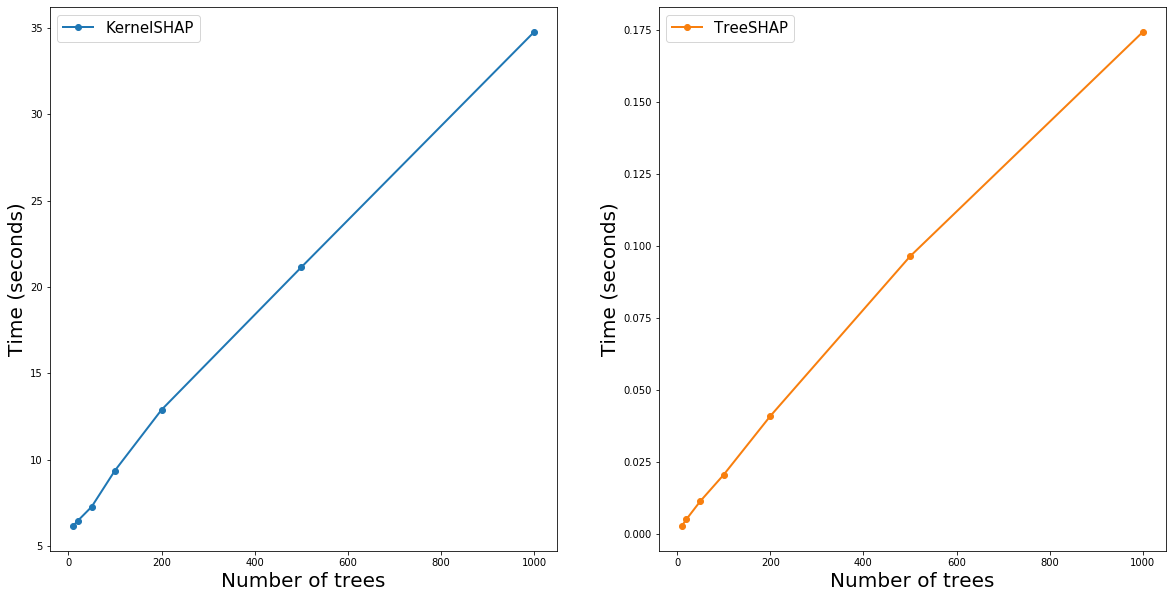

In [298]:
#Get average run time
avg_3 = results_3.groupby(by='trees',as_index=False).mean()

k_sec = [t.total_seconds() for t in avg_3['kernelSHAP']]
t_sec = [t.total_seconds() for t in avg_3['treeSHAP']]
trees = avg_3['trees']

print((k_sec/trees)/(t_sec/trees))

3Plot 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

ax[0].plot(trees, k_sec, linestyle='-', linewidth=2,marker='o',label = 'KernelSHAP')
ax[0].set_ylabel('Time (seconds)',size=20)
ax[0].set_xlabel('Number of trees',size=20)
ax[0].legend(fontsize=15)

ax[1].plot(trees, t_sec, color='#F87F0E', linewidth=2,marker='o',label = 'TreeSHAP')
ax[1].set_ylabel('Time (seconds)',size=20)
ax[1].set_xlabel('Number of trees',size=20)
ax[1].legend(fontsize=15)

plt.savefig(path.format('n_trees_1.png'),dpi=100,bbox_inches='tight')

## Experiment 4: tree depth

In [122]:
#Simulate regression data
data = ds.make_regression(n_samples=10000, n_features=10, n_informative=8, n_targets=1)

y= data[1]
X = data[0]

feature_names = range(len(X))

results = []

#for depth in [2,4,6]:
for depth in [2,4,6,8,10,15,20]*3:

    #Train model
    model = RandomForestRegressor(n_estimators=100,max_depth=depth,random_state=0)
    model.fit(X, y)
    
    #get model properties
    avg_depth, avg_feat, avg_leaves = model_properties(model)
    
    #Get shap estimators
    kernelSHAP = shap.KernelExplainer(model.predict,shap.sample(X, 10))
    treeSHAP = shap.TreeExplainer(model)
    
    kernel_time = runSHAP(n=100)
    tree_time = runSHAP(n=100,kernel=False)
    result = [depth, avg_depth, avg_feat, avg_leaves, kernel_time,tree_time]
    results.append(result)

results_4 = pd.DataFrame(results,columns = ['depth','avg_depth', 'avg_feat', 'avg_leaves','kernelSHAP','treeSHAP'])

100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.19it/s]


Kernel 100:  0:00:08.207245
Tree 100:  0:00:00.005099


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.30it/s]


Kernel 100:  0:00:08.849167
Tree 100:  0:00:00.023898


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.40it/s]


Kernel 100:  0:00:09.614093
Tree 100:  0:00:00.106161


100%|█████████████████████████████████████████| 100/100 [00:10<00:00,  9.12it/s]


Kernel 100:  0:00:10.971880
Tree 100:  0:00:00.488557


100%|█████████████████████████████████████████| 100/100 [00:12<00:00,  8.05it/s]


Kernel 100:  0:00:12.419236
Tree 100:  0:00:01.994045


100%|█████████████████████████████████████████| 100/100 [00:15<00:00,  6.38it/s]


Kernel 100:  0:00:15.686954
Tree 100:  0:00:13.128808


100%|█████████████████████████████████████████| 100/100 [00:16<00:00,  6.04it/s]


Kernel 100:  0:00:16.570192
Tree 100:  0:00:17.995537


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.28it/s]


Kernel 100:  0:00:08.149420
Tree 100:  0:00:00.004585


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.34it/s]


Kernel 100:  0:00:08.817253
Tree 100:  0:00:00.024005


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.40it/s]


Kernel 100:  0:00:09.615422
Tree 100:  0:00:00.107386


100%|█████████████████████████████████████████| 100/100 [00:11<00:00,  8.94it/s]


Kernel 100:  0:00:11.188152
Tree 100:  0:00:00.494814


100%|█████████████████████████████████████████| 100/100 [00:12<00:00,  8.08it/s]


Kernel 100:  0:00:12.372592
Tree 100:  0:00:01.999065


100%|█████████████████████████████████████████| 100/100 [00:15<00:00,  6.45it/s]


Kernel 100:  0:00:15.502947
Tree 100:  0:00:13.625843


100%|█████████████████████████████████████████| 100/100 [00:16<00:00,  5.95it/s]


Kernel 100:  0:00:16.797012
Tree 100:  0:00:18.526271


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.36it/s]


Kernel 100:  0:00:08.804645
Tree 100:  0:00:00.005782


100%|█████████████████████████████████████████| 100/100 [00:10<00:00,  9.76it/s]


Kernel 100:  0:00:10.249470
Tree 100:  0:00:00.023706


100%|█████████████████████████████████████████| 100/100 [00:10<00:00,  9.95it/s]


Kernel 100:  0:00:10.048011
Tree 100:  0:00:00.121550


100%|█████████████████████████████████████████| 100/100 [00:11<00:00,  8.49it/s]


Kernel 100:  0:00:11.787075
Tree 100:  0:00:00.534173


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


Kernel 100:  0:00:13.544352
Tree 100:  0:00:02.103914


100%|█████████████████████████████████████████| 100/100 [00:15<00:00,  6.37it/s]


Kernel 100:  0:00:15.701111
Tree 100:  0:00:13.126807


100%|█████████████████████████████████████████| 100/100 [00:16<00:00,  6.04it/s]

Kernel 100:  0:00:16.556638
Tree 100:  0:00:18.142643


Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


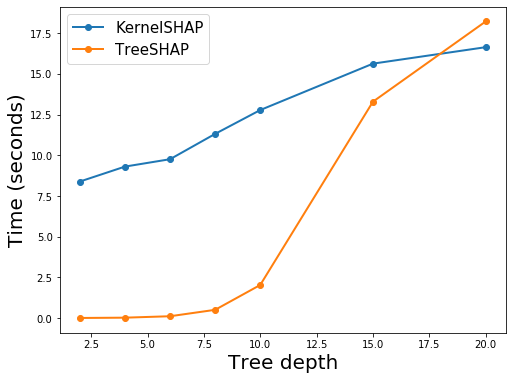

In [299]:
avg_4 = results_4[['depth','kernelSHAP','treeSHAP']].groupby(by='depth',as_index=False).mean()

#Tree Depth
k_sec = [t.total_seconds() for t in avg_4['kernelSHAP']]
t_sec = [t.total_seconds() for t in avg_4['treeSHAP']]
depth = avg_4['depth']

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.plot(depth, k_sec, linestyle='-', linewidth=2,marker='o',label = 'KernelSHAP')
plt.plot(depth, t_sec, linestyle='-', linewidth=2,marker='o',label = 'TreeSHAP')
plt.legend(fontsize=15)

plt.ylabel('Time (seconds)',size=20)
plt.xlabel('Tree depth',size=20)

plt.savefig(path.format('tree_depth.png'),dpi=100,bbox_inches='tight')

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


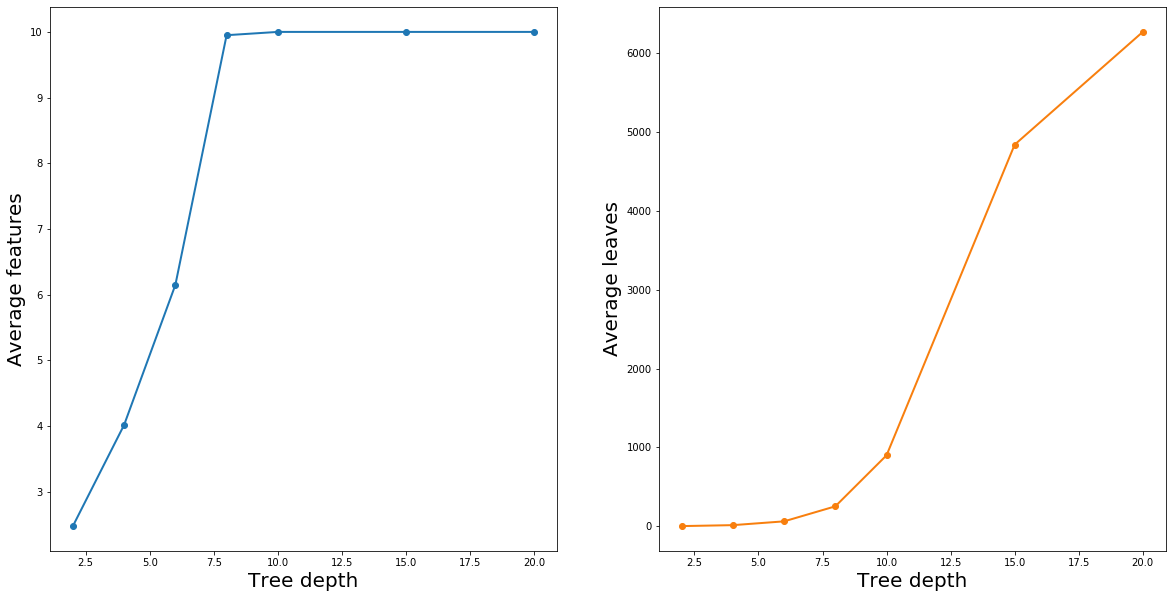

In [300]:
#Other factors
r4 = results_4[['depth','avg_depth','avg_feat','avg_leaves']].groupby(by='depth',as_index=False).mean()


fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

ax[0].plot(r4['depth'], r4['avg_feat'], linestyle='-', linewidth=2,marker='o')
ax[0].set_ylabel('Average features',size=20)
ax[0].set_xlabel('Tree depth',size=20)

ax[1].plot(r4['depth'], r4['avg_leaves'], color='#F87F0E', linewidth=2,marker='o')
ax[1].set_ylabel('Average leaves',size=20)
ax[1].set_xlabel('Tree depth',size=20)

plt.savefig(path.format('other_factors.png'),dpi=100,bbox_inches='tight')

# Archive 

In [99]:
#
data = ds.make_regression(n_samples=10000, n_features=10, n_informative=8, n_targets=1)

y= data[1]
X = data[0]

feature_names = range(len(X))

depth = 10 # vary this value 
model = RandomForestRegressor(n_estimators=100,max_depth=depth,random_state=0)
model.fit(X, y)

model_properties(model)

(10.0, 10.0, 874.48)

In [ ]:
#Simulate regression data
data = ds.make_regression(n_samples=10000, n_features=20, n_informative=20, n_targets=1,noise=0.1)

y= data[1]
X = data[0]

feature_names = range(len(X))

#Train model
model = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=0)
model.fit(X, y)

#get model properties
avg_depth, avg_feat, avg_leaves = model_properties(model)


#Get shap estimators
treeSHAP = shap.TreeExplainer(model)
kernelSHAP = shap.KernelExplainer(model.predict,shap.sample(X, 20))

#get shap values 
x_sample = X[np.random.choice(X.shape[0], 100, replace=True)]
sv_tree = treeSHAP.shap_values(x_sample)
sv_kernel = kernelSHAP.shap_values(x_sample,l1_reg=0.1)

print(len(sv_tree[0]),len(sv_kernel[0]))